In [108]:
#------------------------------------------------------------------------------#

# Numerik WiSe 2021/22 - Blatt 6
# Aufgabe 6.4
# Autor: Jakob Sachs
# Gruppe: NumerikNumerik
# Benoetigte Module: numpy, matplotlib

#------------------------------------------------------------------------------#

# Importiere Module #

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

# Lade StyleSheet #

plt.style.use('fivethirtyeight')


In [112]:

#------------------------------------------------------------------------------#
# Aufgabe 4.1
#------------------------------------------------------------------------------#
def g(x): return (17/4)*(4 *np.exp(np.pi/8) - 1) * np.exp(x/4)*np.cos(x) 


def int_trapez(x_i,y_i):
  """  Funktion zum integrieren einer Funktion mithilfe der zusammen-gesetzten 
  Trapezregel

  param x_i: Die Stuetzstellen [x_0, ..., x_n]

  param y_i: Die Funktionswerte an den Stuetzstellen [y_0, ..., y_n]
  """
  res = 0

  for i in range(len(x_i)-1):
    res += (x_i[i+1]-x_i[i])*(y_i[i]+y_i[i+1])/2
  return res

def integrate_t(f,a,b,n):
  """Funktion zum intergrieren einer Funktion f zwischen a und b mit n Schritten. 
  Alternative zu int_trapez.
  """

  x = np.linspace(a,b,n)
  y = f(x)
  return int_trapez(x,y)


def int_quad(x_i,y_i,dy_i):
  """  Funktion zum integrieren einer Funktion mithilfe der zusammen-gesetzten 
  Quadraturregel aus Aufgabe 2

  param x_i: Die Stuetzstellen [x_0, ..., x_n]

  param y_i: Die Funktionswerte an den Stuetzstellen [y_0, ..., y_n]

  param dy_i: Die Ableitungen an den Stuetzstellen [dy_0, ..., dy_n]
  """
  res = 0

  for i in range(len(x_i)-1):
    res += (((x_i[i+1]-x_i[i])/2 )*(y_i[i]+y_i[i+1])
    +  ((abs(x_i[i+1]-x_i[i])**2)/12 )*( dy_i[i]- dy_i[i+1]  ))
  return res

def integrate_q(f,a,b,n):
  """Funktion zum intergrieren einer Funktion f zwischen a und b mit n Schritten. 
  Alternative zu int_quad.
  """

  x = np.linspace(a,b,n)
  y = f(x)
  return int_quad(x,y,derivative(f,x)) # derivative() ist die Ableitungen von f an den Stellen x



for i in range(4,16,2): # n = 4,6,...,14
  x_int = np.linspace(0, np.pi/2,i)
  y_int = g(x_int)
  
  y_int_trapez = integrate_t(g,0,np.pi/2,i)
  y_int_quad = integrate_q(g,0,np.pi/2,i)
  
  print(f"[n={i}]\tI: {y_int_trapez:.4f}\t(Trapez)")
  print(f"[n={i}]\tI: {y_int_quad:.4f}\t(Quad)")
  print("\n")


[n=4]	I: 23.4129	(Trapez)
[n=4]	I: 24.0926	(Quad)


[n=6]	I: 23.9462	(Trapez)
[n=6]	I: 24.1909	(Quad)


[n=8]	I: 24.0926	(Trapez)
[n=8]	I: 24.2174	(Quad)


[n=10]	I: 24.1527	(Trapez)
[n=10]	I: 24.2282	(Quad)


[n=12]	I: 24.1831	(Trapez)
[n=12]	I: 24.2337	(Quad)


[n=14]	I: 24.2006	(Trapez)
[n=14]	I: 24.2368	(Quad)




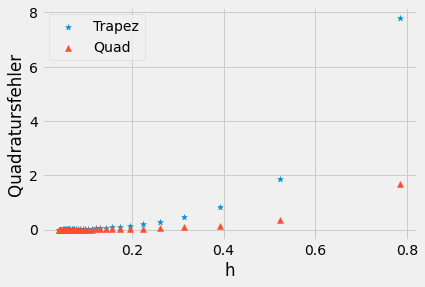

In [114]:
#------------------------------------------------------------------------------#
# Aufgabe 4.2
#------------------------------------------------------------------------------#

# Als Referenz-Wert um unseren Quadraturfehler zu berechnen
from scipy.integrate import quad

err_trap = []
err_quad = []

h = []

for i in range(2,40):
  x_int = np.arange(0, np.pi/2, (np.pi/2)/i)
  y_int = g(x_int)
  y_int_reference,_ = quad(g,0,np.pi/2)

  h.append((np.pi/2)/i)
  e = abs(y_int_reference - integrate_t(g,0,np.pi/2,i)) 
  err_trap.append(e)

  e = abs(y_int_reference - integrate_q(g,0,np.pi/2,i))
  err_quad.append(e)

# Plotten des gemessenen Fehlers
plt.scatter(h,err_trap,label="Trapez",marker="*")
plt.scatter(h,err_quad,label="Quad",marker="^")
plt.xlabel("h")
plt.ylabel("Quadratursfehler")
plt.legend()
plt.show()

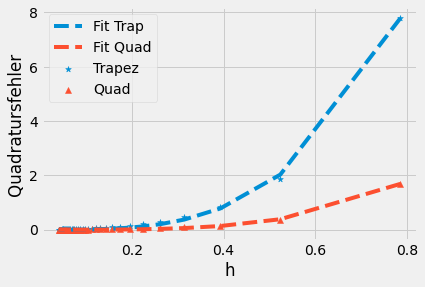

K_1: 17.3574	p_1: 3.32
K_2: 4.0679	p_2: 3.64


In [111]:
# Wir fitten unseren 'gemessenen Fehler' um die Fehlerabschätzungs-parameter 
# (K und p) zu finden
import scipy.optimize as opt


# Die Funkion an der wir den Fehler abschätzen wollen
def fit(h,K,p): 
  return K * np.power(h,p)

# Wir fitten die Fehlerabschätzung anhand der Daten (Die (1,1) sind hierbei 
# die Startwerte für das finden von K und p)
params_quad,_ = opt.curve_fit(fit,h,err_quad,(1,1))
K_quad,p_quad = params_quad

params_trap,_ = opt.curve_fit(fit,h,err_trap,(1,1))
K_trap,p_trap = params_trap


#Plotten der Fehlerabschätzung gegen den gemessenen Fehler
plt.scatter(h,err_trap,label="Trapez",marker="*")
plt.scatter(h,err_quad,label="Quad",marker="^")
plt.plot(h,fit(h,K_trap,p_trap),"--",label="Fit Trap")
plt.plot(h,fit(h,K_quad,p_quad),"--",label="Fit Quad")
plt.plot()
plt.xlabel("h")
plt.ylabel("Quadratursfehler")
plt.legend()
plt.show()

# Ausgabe der Parameter
print(f"K_1: {K_trap:.4f}\tp_1: {p_trap:.2f}")
print(f"K_2: {K_quad:.4f}\tp_2: {p_quad:.2f}")

